In [1]:
import torch

import numpy as np
import os
import matplotlib.pyplot as plt

from network.feature_network import FeatureNet

from co3d.dataset.dataloader_zoo import dataloader_zoo
from co3d.dataset.dataset_zoo import dataset_zoo

In [2]:
category = "teddybear"
task = "multisequence"

m_datasets = dataset_zoo(
        category=category,
        assert_single_seq=task == "singlesequence",
        dataset_name=f"co3d_{task}",
        test_on_train=False,
        load_point_clouds=False,
    )

set_names_mapping :{'train': ['train_known'], 'val': ['test_known', 'test_unseen', 'train_known', 'train_unseen'], 'test': ['test_known', 'test_unseen', 'train_known', 'train_unseen']}
Dataset :  train
subsets :  ['train_known']
Loading Co3D frames from ../dataset/CO3D/teddybear/frame_annotations.jgz.
Loading Co3D sequences from ../dataset/CO3D/teddybear/sequence_annotations.jgz.
Loading Co3D subset lists from ../dataset/CO3D/teddybear/set_lists.json.
Removing images with empty masks.
... filtered 72865 -> 63135
Limitting Co3D dataset to the '['train_known']' subsets.
CO3D Dataset #frames=44455
Dataset :  val
subsets :  ['test_known', 'test_unseen', 'train_known', 'train_unseen']
Loading Co3D frames from ../dataset/CO3D/teddybear/frame_annotations.jgz.
Loading Co3D sequences from ../dataset/CO3D/teddybear/sequence_annotations.jgz.
Loading Co3D subset lists from ../dataset/CO3D/teddybear/set_lists.json.
Removing images with empty masks.
... filtered 72865 -> 63135
Limitting Co3D dataset

In [3]:
# batch_size * batch_num_per_seq <= 70
batch_size = 1
batch_num_per_seq = 10

m_dataloaders = dataloader_zoo(
        m_datasets,
        batch_size=batch_size,
        dataset_name=f"co3d_multisequence",
        images_per_seq_options=[batch_size * batch_num_per_seq],
    )

dataset_set : train, dataset : CO3D Dataset #frames=44455, batch_size : 1, dataset_len : 1000, dataset_len_val : 1, images_per_seq_options : [10]
dataset_set : val, dataset : CO3D Dataset #frames=63135, batch_size : 1, dataset_len : 1000, dataset_len_val : 1, images_per_seq_options : [10]
dataset_set : test, dataset : CO3D Dataset #frames=63135, batch_size : 1, dataset_len : 1000, dataset_len_val : 1, images_per_seq_options : [10]


In [4]:
train_loader = m_dataloaders["train"]

In [5]:
feature_net = FeatureNet()

In [10]:
data_frame = next(iter(train_loader))

img = data_frame.image_rgb
print(img.shape)

torch.Size([1, 3, 800, 800])


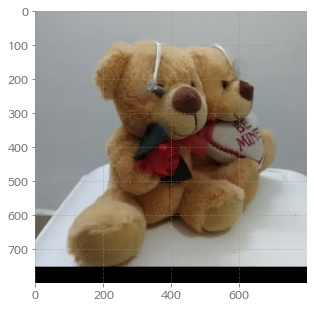

In [11]:
img_np = img.permute(0, 2, 3, 1).numpy()

plt.figure(figsize=(15, 5))

plt.subplot(1, 1, 1)
plt.imshow(img_np[0])
# plt.subplot(1, 3, 2)
# plt.imshow(img_np[1])
# plt.subplot(1, 3, 3)
# plt.imshow(img_np[2])

In [12]:
img_feature = feature_net(img)

In [13]:
img_feature.shape

torch.Size([1, 99, 800, 800])

(99, 800, 800)


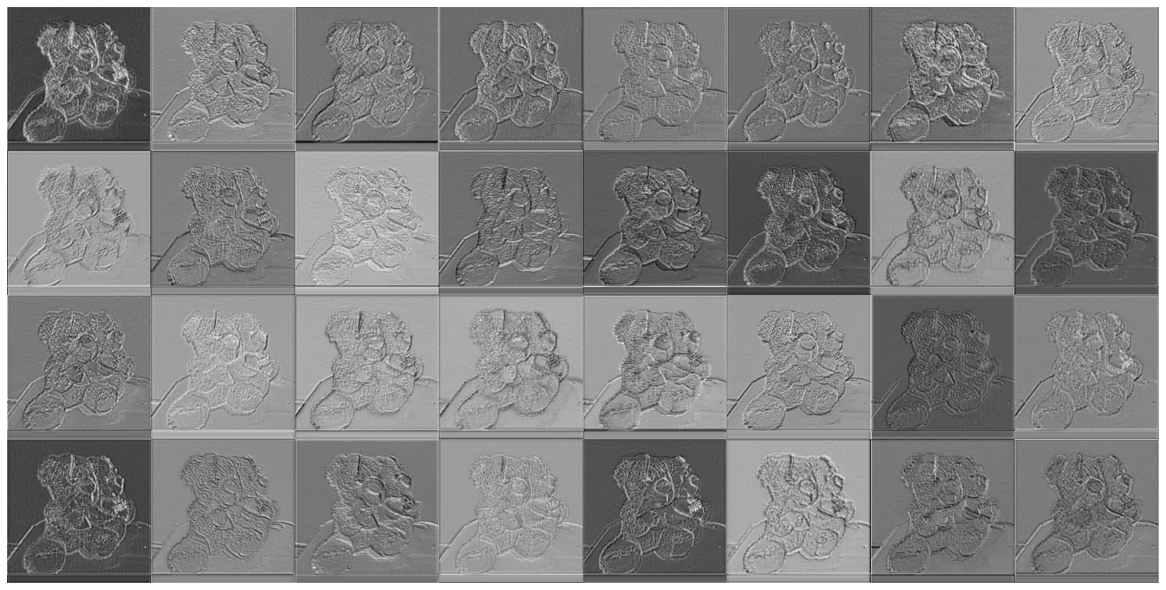

In [15]:
outputs = img_feature[0].detach().numpy()
print(outputs.shape)


####################### (layer 1) features
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)

for i in range(outputs.shape[0]):
    if i == 32: # we will visualize only 8x8 blocks from each layer
        break
    plt.subplot(4, 8, i + 1)
    plt.imshow(outputs[i, :, :], cmap='gray')
    plt.axis("off")

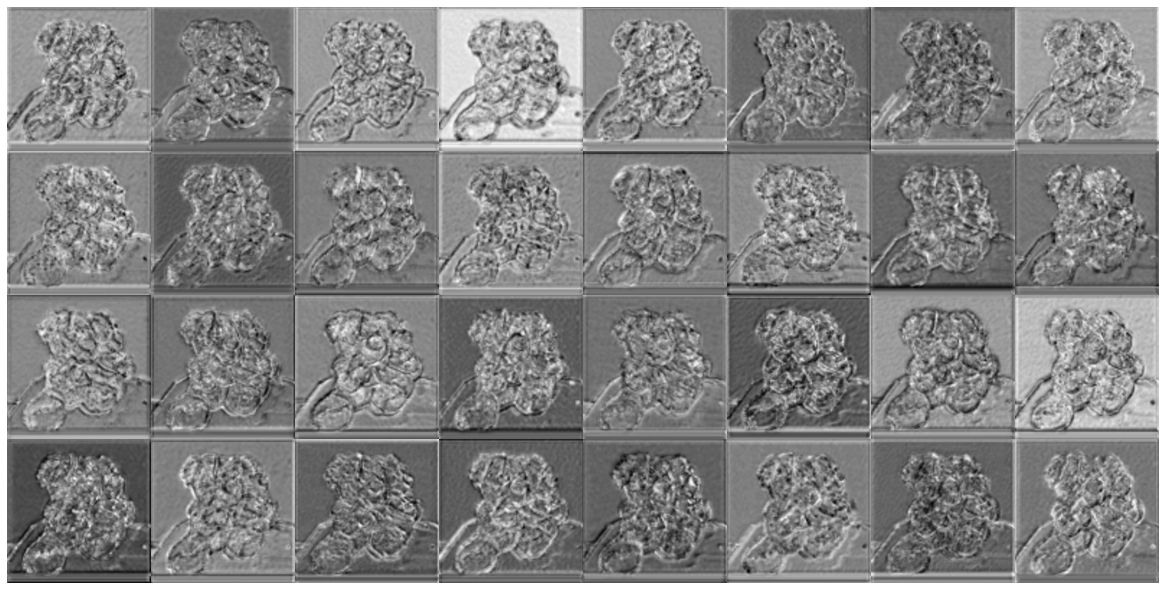

In [16]:
####################### (layer 2) features
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)

for i in range(32, outputs.shape[0]):
    if i == 64: # we will visualize only 8x8 blocks from each layer
        break
    plt.subplot(4, 8, i - 31)
    plt.imshow(outputs[i, :, :], cmap='gray')
    plt.axis("off")

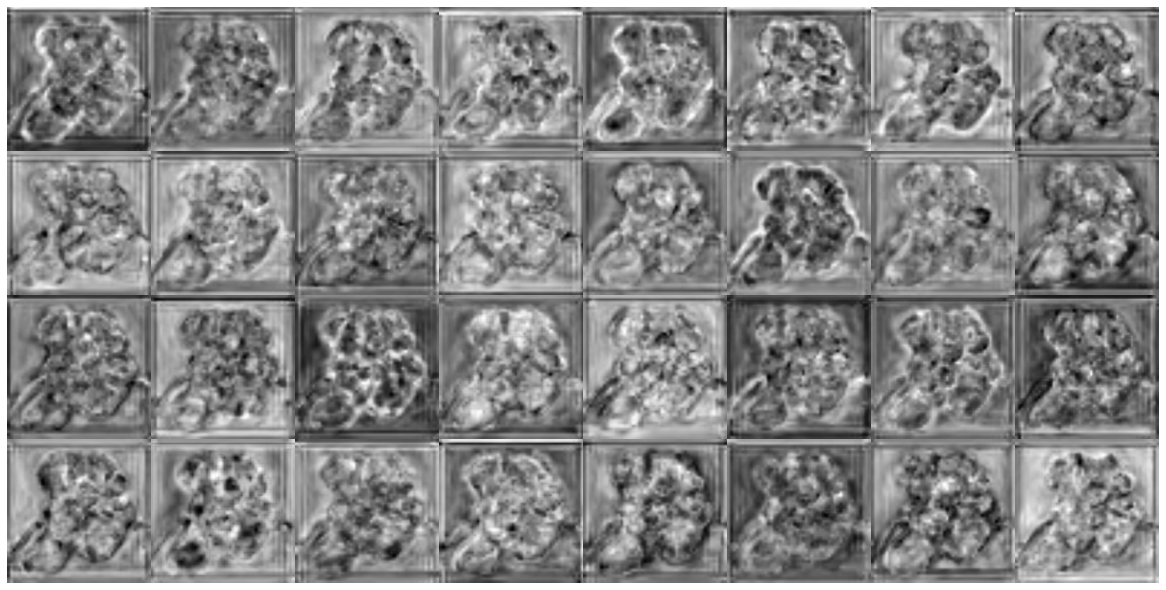

In [18]:
####################### (layer 3) features
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)

for i in range(64, outputs.shape[0]):
    if i == 96: # we will visualize only 8x8 blocks from each layer
        break
    plt.subplot(4, 8, i - 63)
    plt.imshow(outputs[i, :, :], cmap='gray')
    plt.axis("off")